In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
def get_date_range(df,start_date, end_date):
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    return mask

In [6]:
consum = pd.read_csv("FilecoinGreenEnergyConsumption-FilecoinGreenEnergyConsumption.csv", 
                          parse_dates = ['Date'])
# removing timezone for plotting
consum["Date"] = consum["Date"].apply(lambda x: x.replace(tzinfo=None))
consum.head()

,Date,Data storage capacity,Data storage capacity added per day,Cumulative renewable energy purchases,Energy intensity lower bound,Energy intensity estimate,Energy intensity upper bound,Energy consumption rate lower bound,Energy consumption rate estimate,Energy consumption rate upper bound,Energy used to seal data lower bound,Energy used to seal data estimate,Energy used to seal data upper bound,Cumulative energy use lower bound,Cumulative energy use estimate,Cumulative energy use upper bound,Energy used to store data lower bound,Energy used to store data estimate,Energy used to store data upper bound
0,2020-08-24,498448,2053024,15734658.47,1404.098113,10618.245610,21402.982540,651.804634,4929.158175,9935.604259,551.893912,3137.985593,5143.64633,15643.17893,1.182999e+05,2.384543e+05,0.482896,1.605601,4.335152
1,2020-08-25,9237744,13984256,16020743.17,516.832219,3906.016457,7877.754829,4446.472725,33604.707650,67774.841940,3759.247698,21374.515770,35036.15498,122357.62330,9.248137e+05,1.865049e+06,8.949526,29.756621,80.343431
2,2020-08-26,22553828,13212864,16306827.87,200.762976,1514.930303,3059.685608,4217.004054,31820.943110,64268.357070,3551.882100,20195.466240,33103.50947,223564.86940,1.688517e+06,3.407488e+06,21.850149,72.650391,196.157408
3,2020-08-27,36361328,14277536,16592912.57,134.966149,1017.172660,2056.697582,4570.510617,34445.662720,69648.265260,3838.087228,21822.785450,35770.93869,333256.20430,2.515214e+06,5.079045e+06,35.226855,117.127110,316.245378
4,2020-08-28,51427203,16174560,16878997.27,108.350558,815.823835,1650.977121,5189.484114,39074.139640,79074.069440,4348.045219,24722.329720,40523.74262,457802.78090,3.452994e+06,6.976821e+06,49.822674,165.657306,447.277813


In [7]:
filusd = pd.read_csv("FIL-USD-FIL-USD.csv", parse_dates = ['Date'])
filusd = filusd[get_date_range(filusd,"2020-08-24", "2022-10-16")] #only relevant dates
filusd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
985,2020-08-24,20.470207,23.807421,20.411312,22.020189,22.020189,16525999
986,2020-08-25,21.975246,22.780449,21.049786,22.193523,22.193523,12692456
987,2020-08-26,22.218300,22.588533,20.349331,21.462585,21.462585,11780846
988,2020-08-27,21.287678,22.822914,20.498943,22.159378,22.159378,12722236
989,2020-08-28,22.072380,24.722673,21.962742,24.273489,24.273489,14827319


## Q1. Analyze the energy performance and the evolution of Filecoin's storage

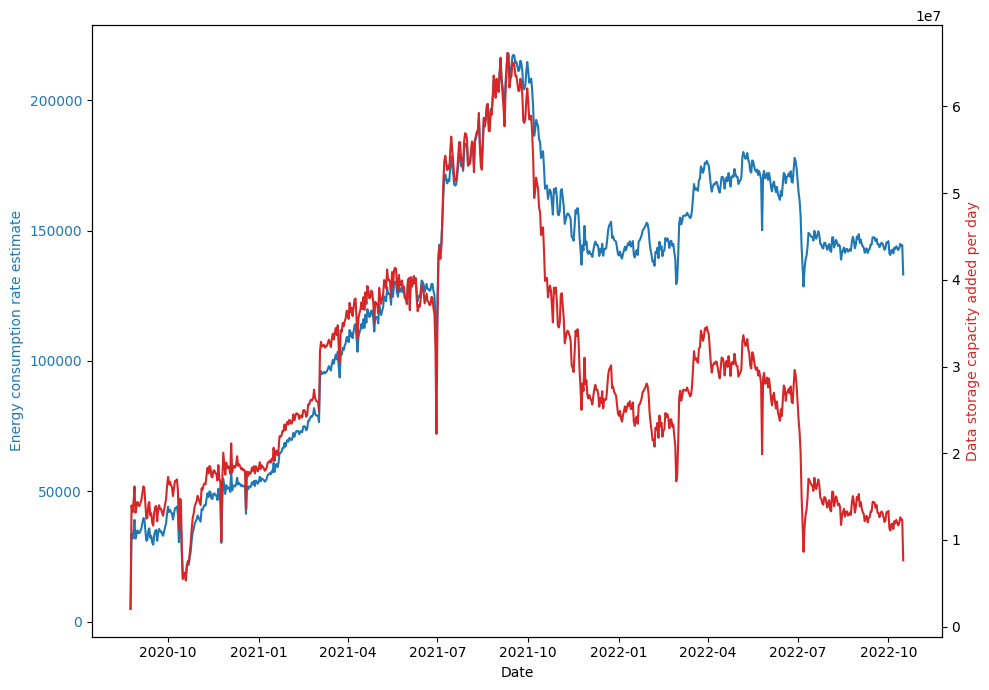

In [8]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum['Date'], consum['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Data storage capacity added per day', color=color)  # we already handled the x-label with ax1
ax2.plot(consum['Date'], consum['Data storage capacity added per day'], color=color)

fig.tight_layout()

plt.show()


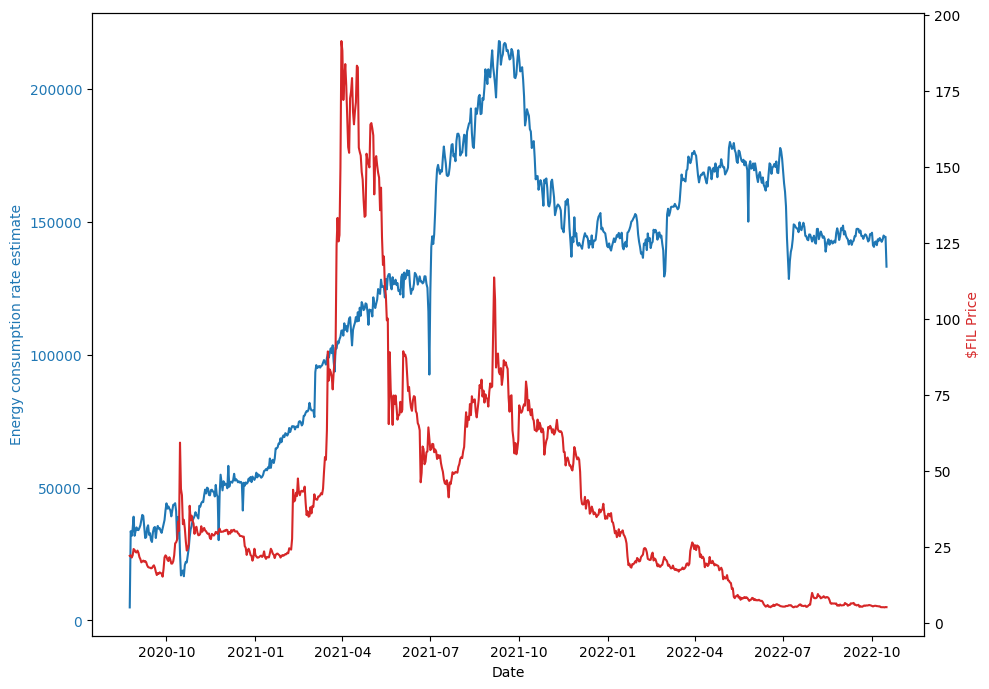

In [9]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum['Date'], consum['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$FIL Price', color=color)  # we already handled the x-label with ax1
ax2.plot(filusd['Date'], filusd['Adj Close'], color=color)

fig.tight_layout()

plt.show()

In [10]:
consum_march = consum[get_date_range(consum, "2021-03-01", "2021-03-31")] # dates: 1 Mar - 31 Mar 2021
consum_jun_jul = consum[get_date_range(consum, "2021-06-10", "2021-07-10")] # dates: 10 Jun - 10 Jul 2021

consum_sep_oct = consum[get_date_range(consum, "2021-09-01", "2021-10-31")] # dates: 1 Sep - 31 Oct 2021
filusd_sep_oct = filusd[get_date_range(filusd, "2021-09-01", "2021-10-31")] # dates: 1 Sep - 31 Oct 2021

consum_feb_may = consum[get_date_range(consum, "2022-02-01", "2022-05-31")] # dates: 1 Feb - 31 May 2022
consum_july22 = consum[get_date_range(consum, "2022-07-01", "2022-07-31")] # dates: 1 Jul - 31 Jul 2022

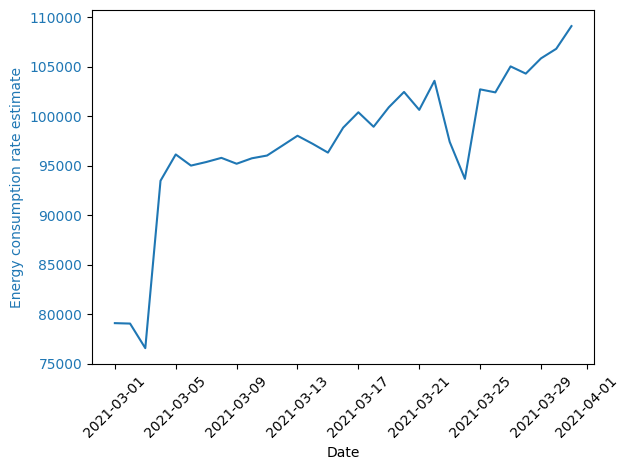

In [11]:
# dates: 1 Mar - 31 Mar 2021
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum_march['Date'], consum_march['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis="x", rotation=45)
fig.tight_layout()

plt.show()

In [12]:
### 3rd Mar to 4th Mar 2021: Large increase in ECR
### From this Filecoin tweet: https://twitter.com/Filecoin/status/1367291069671510016
### The network upgraded to version 10 on Mar 4 2021, resulting in a 90% reduction 
### to the cost of Window PoSt messages. This means that SPs can now provide 
### more storage to the network for the same cost prior to the upgrade.
### This was extremely beneficial to SPs resulting in the huge increase of ECR.

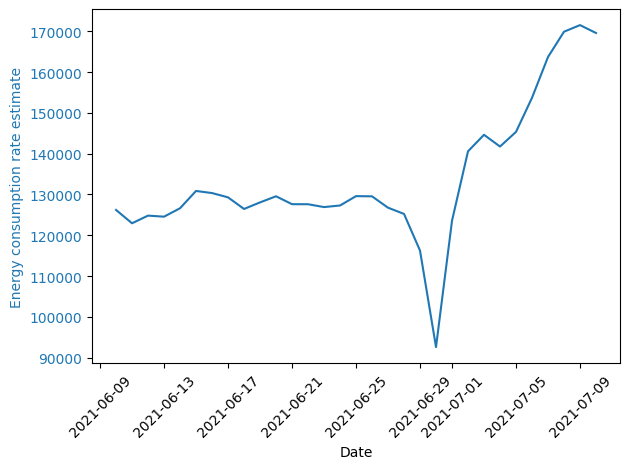

In [13]:
# dates: 10 Jun - 10 Jul 2021
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum_jun_jul['Date'], consum_jun_jul['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis="x", rotation=45)
fig.tight_layout()

plt.show()

In [14]:
### 1. around 29 june 2021: Sharp decrease in ECR 
### 2. 30 june 2021 onwards: Sharp increase in ECR

### 1. 
### https://blog.crypto.com/crypto-com-supports-filecoin-networkss-mainnet-upgrade/
### A possible reason is the v13 HyperDrive upgrade (epoch 892800, on 30 June 2021, 22:00 UTC).
### Drop in ECR caused by missed WindowPoSt during the Filecoin network upgrade during that time 
### as Storage Providers (SPs) upgrade their systems and thereby missing WindowPoSt. 

### 2.
### Pent-up demand of file storage on the network from the previous days before. Resulting in
### the sharp increase of energy consumption rate from after the mainnet upgrade.

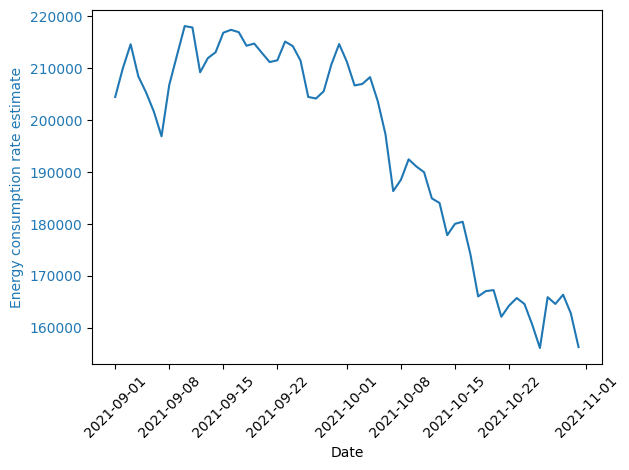

In [15]:
# dates: 1 Sep - 31 Oct 2021
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum_sep_oct['Date'], consum_sep_oct['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis="x", rotation=45)
fig.tight_layout()

plt.show()

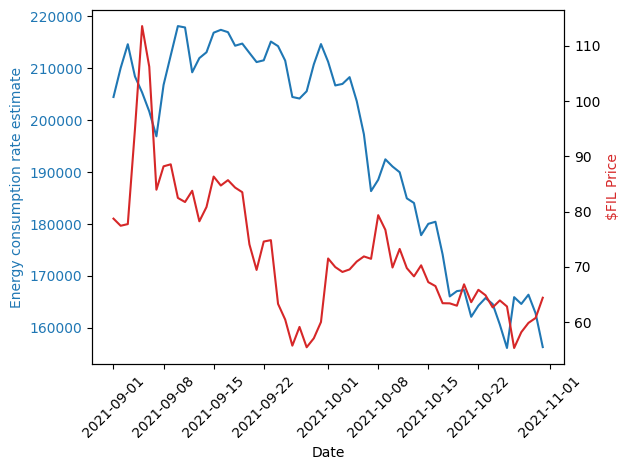

In [16]:
## dates: 1 Sep - 31 Oct 2021 (price of FIL and ECR) 
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum_sep_oct['Date'], consum_sep_oct['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis="x", rotation=45)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$FIL Price', color=color)  # we already handled the x-label with ax1
ax2.plot(filusd_sep_oct['Date'], filusd_sep_oct['Adj Close'], color=color)

fig.tight_layout()

plt.show()

In [17]:
## Early Sep 2021 till end Oct 2021: Sharp decrease of ECR
## The decrease in ECR (and decrease in daily added storage) in this period of time almost perfectly coincided with the 
## huge fall in price of $FIL token. Generally, the amount of storage placed on the network
## should not be correlated with the price of the token. However in this case, 
## with the fall in price of FIL (almost 50% in this time period), SPs might have found that 
## the monetary rewards for providing storage is not enough to cover the costs for doing so. Thus, a large number of
## SPs might have decided not to continue doing so, resulting in a decrease in storage provided and energy used.

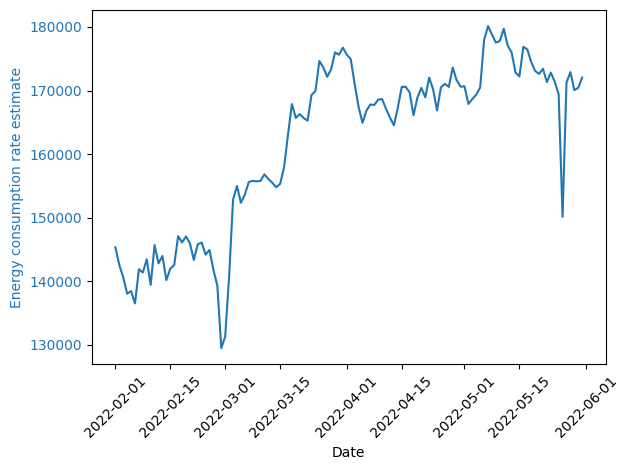

In [18]:
# dates: 1 Feb - 31 May 2022
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum_feb_may['Date'], consum_feb_may['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis="x", rotation=45)
fig.tight_layout()

In [19]:
### 1. 20 Feb 22 - 28 Feb 2022: Decrease in energy consumption rate (ECR) 
### 2. 1 March 2022 onwards: Spike in ECR

### 1. 
### From these tweets: https://twitter.com/Starboard_V/status/1503616856229224450 , 
### https://twitter.com/Starboard_V/status/1499046106897928192
### Drop in ECR caused by missed WindowPoSt during the Filecoin network upgrade during that time 
### as Storage Providers (SPs) upgrade their systems and thereby missing WindowPoSt. 

### 2. 
### This is most likely an amalgamation of 2 reasons that drove the increase in ECR.
### A possible reason is the pent-up demand from the Filecoin network upgrade (as stated above).
### From this tweet: https://twitter.com/M31Capital/status/1502364914891038734
### Another potential reason for the large spike could be due to the Russia-Ukraine war that drove an increase in 
### demand for decentralised file storage (incl. Filecoin). With the uncertainty in the security 
### (both cyber & physical) of data centres or other file storage facilities in Russia/Ukraine, 
### this might have caused a migration of files to Filecoin storage to preserve existing off-chain
### files that were previously not on the network. 

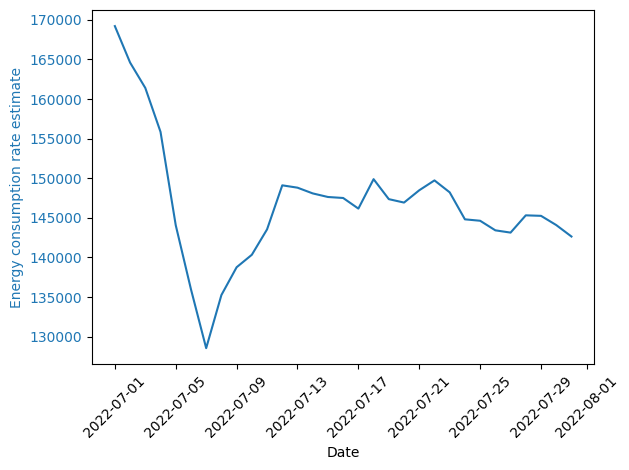

In [20]:
# dates: 1 Jul - 31 Jul 2022
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy consumption rate estimate', color=color)
ax1.plot(consum_july22['Date'], consum_july22['Energy consumption rate estimate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis="x", rotation=45)
fig.tight_layout()

In [21]:
### 1. 1 Jul - 6 Jul 2022: Large decrease in energy consumption rate (ECR). 
### 2. 6 Jul 2022 onwards: Increase in ECR

### 1.
### https://filecoin.io/blog/posts/filecoin-v16-network-upgrade-skyr/
### The fall in energy consumption rate would likely be in anticipation of the Filecoin v16 Network Upgrade (Skyr). 
### Drop in ECR caused by missed WindowPoSt during the Filecoin network upgrade during that time 
### as Storage Providers (SPs) upgrade their systems and thereby missing WindowPoSt. 

### 2.
### Subsequently, from 6 Jul onwards, it can be seen that the energy consumption rate recovered, 
### albeit not to its levels at 1 Jul 2022. The recovery could be due to pent-up demand for file storage 
### for file storage on the network from the previous days before.

In [22]:
consum[['Data storage capacity added per day', 'Energy consumption rate estimate']].corr()

,Data storage capacity added per day,Energy consumption rate estimate
Data storage capacity added per day,1.000000,0.635297
Energy consumption rate estimate,0.635297,1.000000


## Q2. Analyze the evolution of the share of renewable energy used by Filecoin

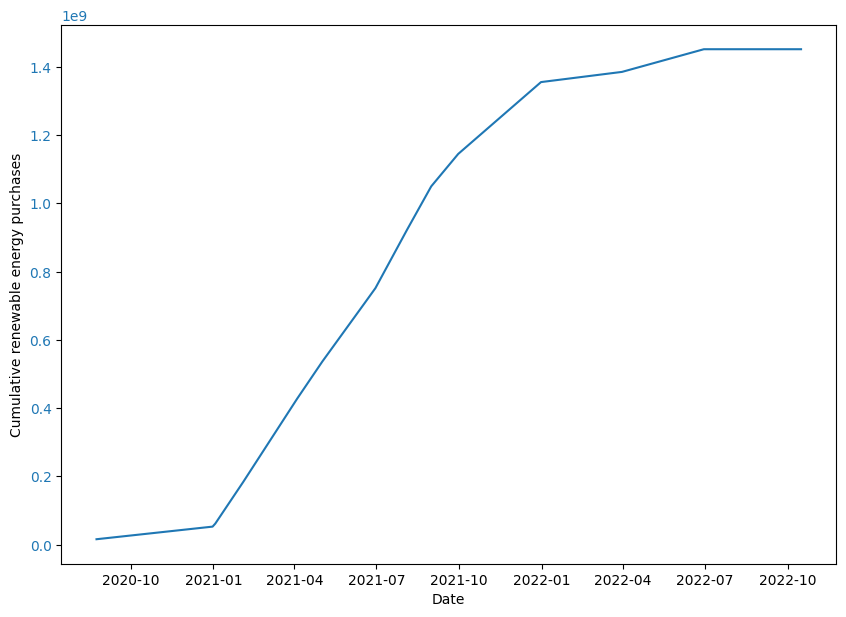

In [35]:
fig, ax1 = plt.subplots(figsize=(10,7))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative renewable energy purchases')
ax1.plot(consum['Date'], consum['Cumulative renewable energy purchases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

In [24]:
# Daily renewable energy purchases 
consum['Daily renewable energy purchases'] = consum['Cumulative renewable energy purchases'].diff().fillna(consum['Cumulative renewable energy purchases'])
consum['Daily renewable energy purchases'].iloc[0] = np.NaN

/var/folders/g3/cm3vv2r574q5lbk4_l_6dmr80000gp/T/ipykernel_5019/3797306324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consum['Daily renewable energy purchases'].iloc[0] = np.NaN


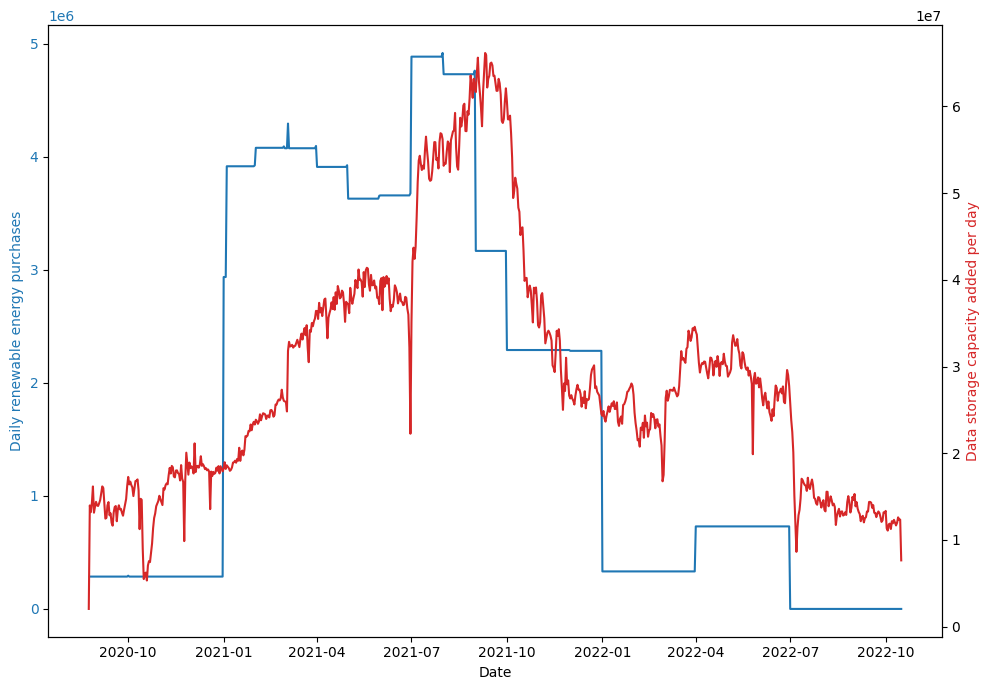

In [25]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily renewable energy purchases', color=color)
ax1.plot(consum['Date'], consum['Daily renewable energy purchases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Data storage capacity added per day', color=color)  # we already handled the x-label with ax1
ax2.plot(consum['Date'], consum['Data storage capacity added per day'], color=color)

fig.tight_layout()

plt.show()


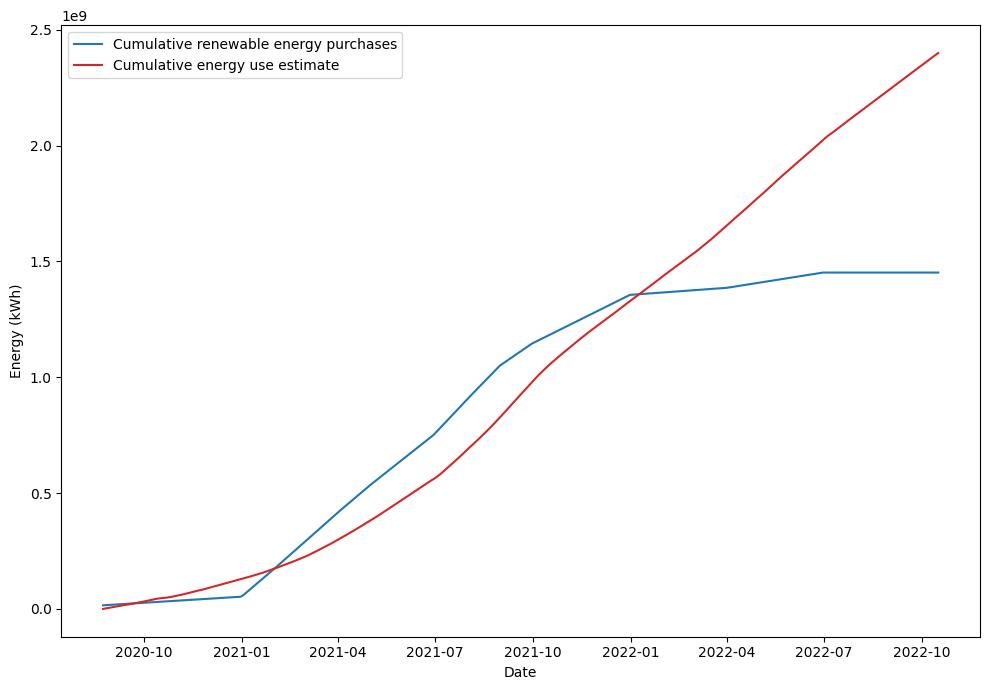

In [26]:
fig, ax1 = plt.subplots(figsize=(10,7))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Energy (kWh)')
ax1.plot(consum['Date'], consum['Cumulative renewable energy purchases'], color=color, label="Cumulative renewable energy purchases")
ax1.plot(consum['Date'], consum['Cumulative energy use estimate'], color="tab:red", label="Cumulative energy use estimate")

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

fig.tight_layout()

plt.show()

In [27]:
consum["Ratio Renewable Energy of Energy used"] = consum['Cumulative renewable energy purchases']/consum['Cumulative energy use estimate']

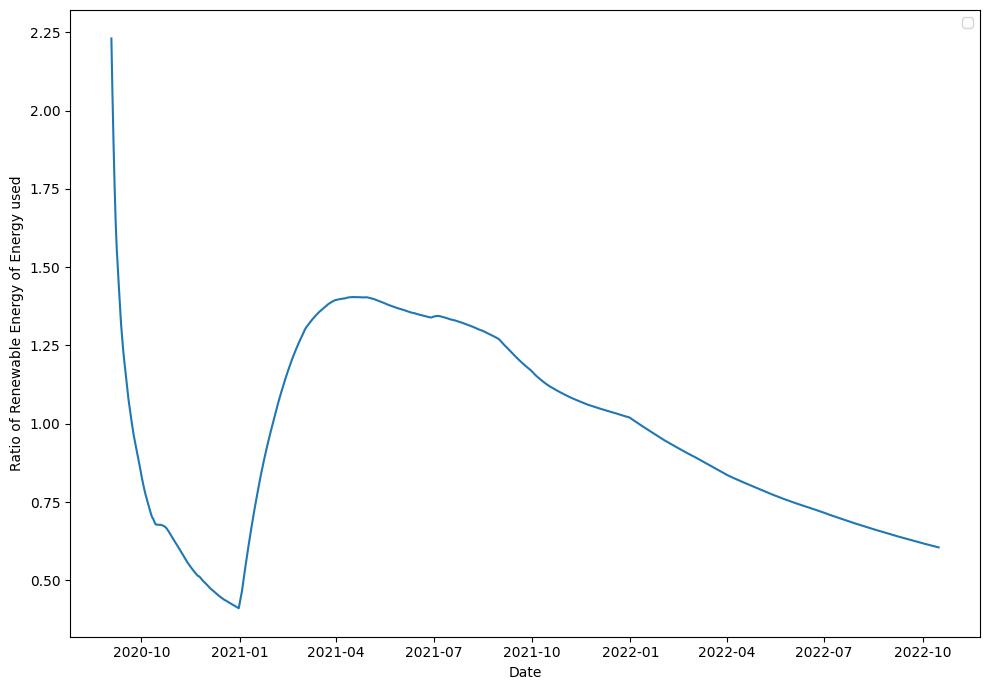

In [28]:
fig, ax1 = plt.subplots(figsize=(10,7))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Ratio of Renewable Energy of Energy used')
#removing the first 10 days because it skews the scale
ax1.plot(consum['Date'][10:], consum["Ratio Renewable Energy of Energy used"][10:], color=color) 

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

fig.tight_layout()

plt.show()

In [29]:
### Initial spurt in ratio of Renewable Energy of Energy used by the network from Jan 2021 and
### peaking at May 2021. From May 2021, gradual decrease in ratio of Renewable Energy of Energy used by the network.
### This shows the gradual decrease in interest of the miners to continually match and offset the electricity 
### usage by the Filecoin network with renewable energy.

## AN INTERESTING OBSERVATION

In [30]:
## Does the price of FIL token correlate with Renewable Energy purchases? 
## Hypothesis: Miners are paid in FIL token, so when FIL token price is high, then
## the miners can afford to pay for Renewable Energy purchases.

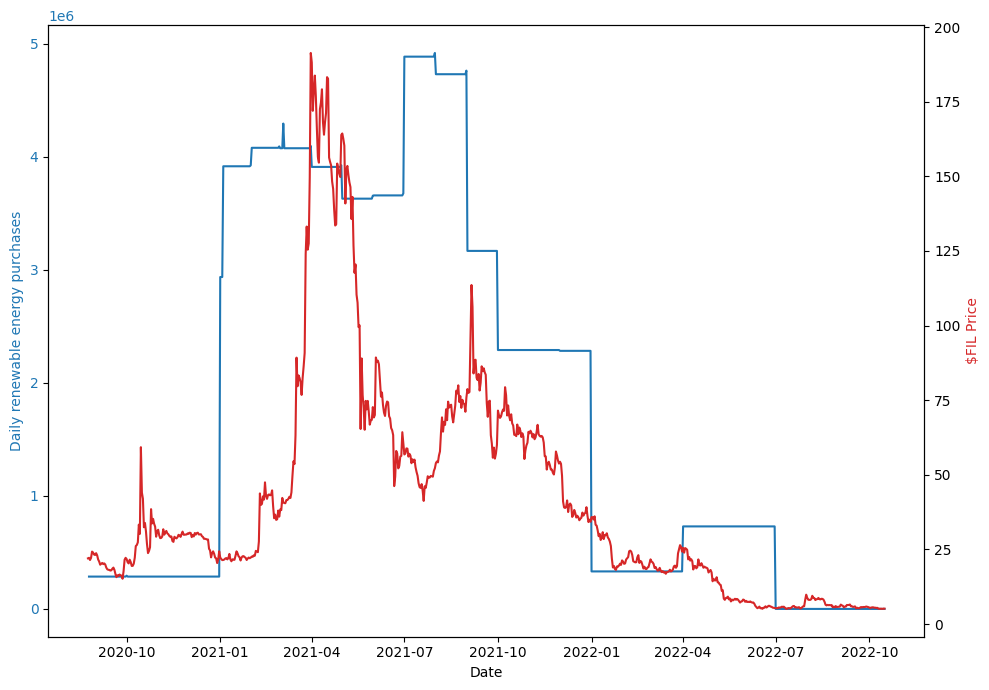

In [31]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily renewable energy purchases', color=color)
ax1.plot(consum['Date'], consum['Daily renewable energy purchases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$FIL Price', color=color)  # we already handled the x-label with ax1
ax2.plot(filusd['Date'], filusd['Adj Close'], color=color)

fig.tight_layout()

plt.show()


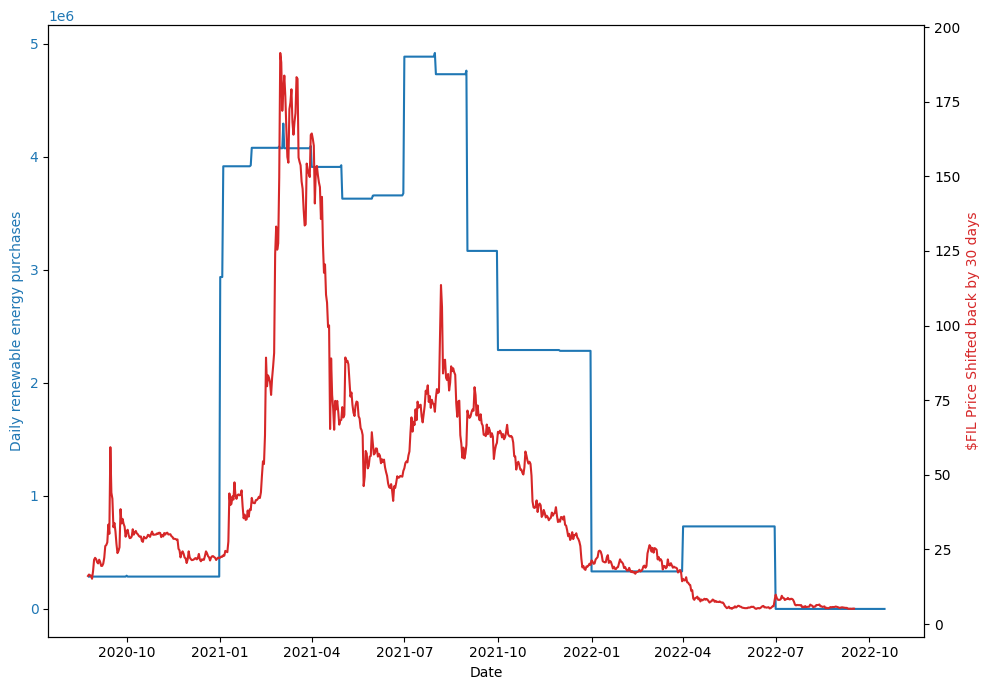

In [32]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily renewable energy purchases', color=color)
ax1.plot(consum['Date'], consum['Daily renewable energy purchases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$FIL Price Shifted back by 30 days', color=color)  # we already handled the x-label with ax1
ax2.plot(filusd['Date'], filusd['Adj Close'].shift(-30), color=color) #shifting prices 30 days back

fig.tight_layout()

plt.show()

In [33]:
### Shifting prices 30 days back, the peaks of both the prices of $FIL and Daily renewable energy purchases
### seem to coincide. This is to say, that the price of $FIL lags the Daily renewable energy purchases by about 30 days.
### Just an interesting fact to note.

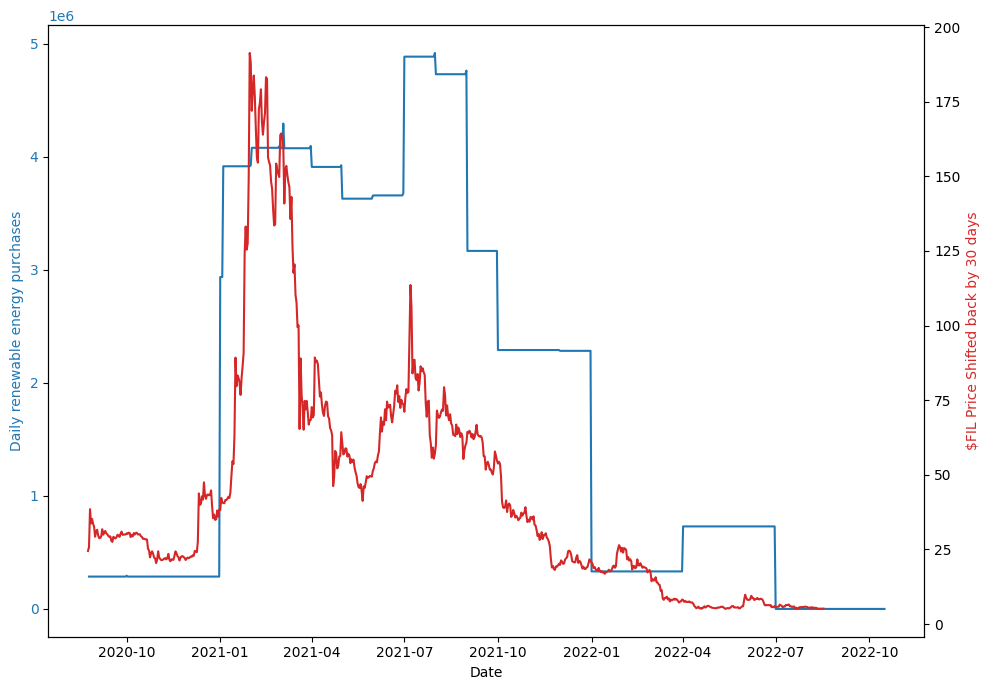

In [34]:
fig, ax1 = plt.subplots(figsize=(10,7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily renewable energy purchases', color=color)
ax1.plot(consum['Date'], consum['Daily renewable energy purchases'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$FIL Price Shifted back by 30 days', color=color)  # we already handled the x-label with ax1
ax2.plot(filusd['Date'], filusd['Adj Close'].shift(-60), color=color) #shifting prices 60 days back

fig.tight_layout()

plt.show()